In [1]:
%matplotlib inline

import elephant
import matplotlib.pyplot as plt
import numpy as np
import quantities as pq 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process

In [2]:
np.random.seed(28)  # to make the results reproducible

spiketrain1 = elephant.spike_train_generation.homogeneous_poisson_process(rate=10 * pq.Hz,
                                                                          t_start=0. * pq.ms,
                                                                          t_stop=10000. * pq.ms)

spiketrain2 = elephant.spike_train_generation.homogeneous_gamma_process(a=3, 
                                                                        b=10 * pq.Hz, 
                                                                        t_start=0. * pq.ms, 
                                                                        t_stop=10000. * pq.ms)

In [3]:
print(f"spiketrain1 has {len(spiketrain1)} spikes:")
print("  t_start:", spiketrain1.t_start)
print("  t_stop:", spiketrain1.t_stop)
print("  spike times:", spiketrain1.times)

spiketrain1 has 86 spikes:
  t_start: 0.0 ms
  t_stop: 10000.0 ms
  spike times: [ 130.56871689  212.9488975   226.29827592  276.98036936  428.98955686
  500.52740058  520.7014934   712.78326741 1023.72240825 1438.5822206
 1459.98833449 1813.33021673 1840.0931127  1842.76384625 2134.75277845
 2389.50529058 2424.31586247 2442.50087352 2492.82347094 2564.29523378
 2601.1175461  2657.25382328 2834.49034266 2917.13387642 3094.85346602
 3673.43814872 3713.87154431 3723.41345679 3872.06098092 3888.24039785
 4017.468012   4327.90323112 4335.49373469 4394.76289732 4578.72228904
 4594.450809   4739.38339953 4891.61080835 5004.02798871 5018.15004066
 5022.15968125 5128.87775206 5157.80376561 5603.63739245 5679.86205063
 5685.96188943 5805.94513287 5904.60968407 6130.73340495 6148.39813404
 6242.65687654 6280.78073663 6424.8624103  6441.85611631 6707.62164194
 6776.49941995 6955.61576645 6981.74827247 6993.04386921 7105.03779348
 7191.54605997 7400.17203231 7985.43419227 8017.63481765 8153.361305

In [4]:
print(f"spiketrain2 has {len(spiketrain2)} spikes:")
print("  t_start:", spiketrain2.t_start)
print("  t_stop:", spiketrain2.t_stop)
print("  spike times:", spiketrain2.times)

spiketrain2 has 31 spikes:
  t_start: 0.0 ms
  t_stop: 10000.0 ms
  spike times: [ 379.69226731  721.17083962  981.4600578  1818.07697508 1930.07766122
 2117.27420237 2247.71381158 2474.5892971  2909.11315779 3322.25690782
 3655.2369896  4204.16482203 4636.17324707 4857.75363151 5128.2982248
 5503.67720515 5711.07539264 5901.13841203 6343.81107862 6644.59205905
 6961.02653437 7099.66475138 7771.05116137 7990.03297516 8243.50574847
 8307.54382197 8532.54018371 9343.19166643 9492.66298758 9675.44381775
 9828.78058714] ms


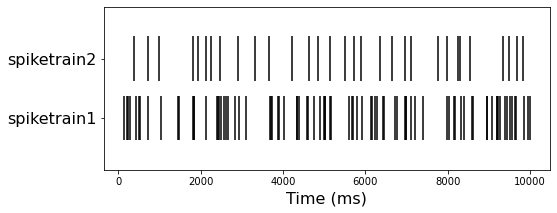

In [5]:
plt.figure(figsize=(8, 3))
plt.eventplot([spiketrain1.magnitude, spiketrain2.magnitude], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.yticks([0,1], labels=["spiketrain1", "spiketrain2"], fontsize=16)
plt.show()

### Mean firing rate

The simplest approach is to assume a stationary firing rate and only use the total number of spikes and the duration of the spike train to calculate the average number of spikes per time unit. This results in a single value for a given spiketrain.

In [9]:
mean_frate1 = elephant.statistics.mean_firing_rate(spiketrain1)
mean_frate1.units = pq.Hz
print("The mean firing rate of spiketrain1 is", mean_frate1)

mean_frate2 = elephant.statistics.mean_firing_rate(spiketrain2)
mean_frate2.units = pq.Hz
print("The mean firing rate of spiketrain2 is", mean_frate2)

The mean firing rate of spiketrain1 is 8.6 Hz
The mean firing rate of spiketrain2 is 3.1 Hz


In [10]:
print("The mean firing rate of spiketrain1 is", elephant.statistics.mean_firing_rate(spiketrain1))
print("The mean firing rate of spiketrain2 is", elephant.statistics.mean_firing_rate(spiketrain2))

The mean firing rate of spiketrain1 is 0.0086 1/ms
The mean firing rate of spiketrain2 is 0.0031 1/ms


The mean firing rate of `spiketrain1` is higher than of `spiketrain2` as expected from the raster plot.

Let’s quickly check the correctness of the `mean_firing_rate()` function by computing the firing rates manually:

In [11]:
fr1 = len(spiketrain1) / (spiketrain1.t_stop - spiketrain1.t_start)
fr2 = len(spiketrain2) / (spiketrain2.t_stop - spiketrain2.t_start)
print("The mean firing rate of spiketrain1 is", fr1)
print("The mean firing rate of spiketrain2 is", fr2)

The mean firing rate of spiketrain1 is 0.0086 1/ms
The mean firing rate of spiketrain2 is 0.0031 1/ms


Additionally, the period within the spike train during which to estimate the firing rate can be further limited using the `t_start` and `t_stop` keyword arguments. Here, we limit the firing rate estimation to the first second of the spiketrain.

In [13]:
elephant.statistics.mean_firing_rate(spiketrain1, t_start=0*pq.ms, t_stop=1000*pq.ms)

array(0.008) * 1/ms

### Coefficient of Variation (CV)

In this section we will numerically verify that the coefficient of variation (CV), a measure of the variability of inter-spike intervals, of a spike train that is modeled as a random (stochastic) Poisson process, is 1.

Let us generate 100 independent Poisson spike trains for 100 seconds each with a rate of 10 Hz for which we later will calculate the CV. For simplicity, we will store the spike trains in a list.

In [15]:
spiketrain_list = [
     elephant.spike_train_generation.homogeneous_poisson_process(rate=10.0*pq.Hz, 
                                                                 t_start=0.0*pq.s, 
                                                                 t_stop=100.0*pq.s)
     for _ in range(100)]

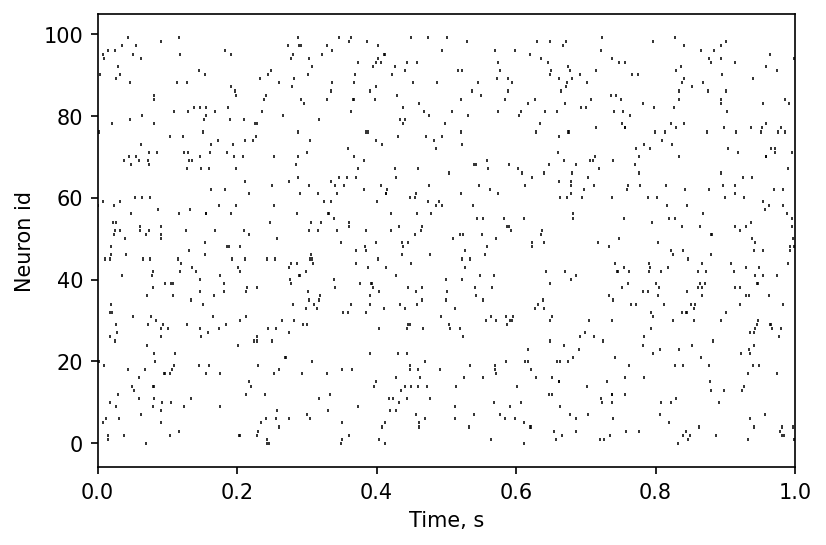

In [16]:
plt.figure(dpi=150)
plt.eventplot([st.magnitude for st in spiketrain_list], linelengths=0.75, linewidths=0.75, color='black')
plt.xlabel("Time, s")
plt.ylabel("Neuron id")
plt.xlim([0, 1])
plt.show()

From the plot you can see the random nature of each Poisson spike train. Let us verify it numerically by calculating the distribution of the 100 CVs obtained from inter-spike intervals (ISIs) of these spike trains.

For each spike train in our list, we first call the `isi()` function which returns an array of all N-1 ISIs for the N spikes in the input spike train. We then feed the list of ISIs into the `cv()` function, which returns a single value for the coefficient of variation:

In [17]:
from elephant.statistics import isi, cv
cv_list = [cv(isi(spiketrain)) for spiketrain in spiketrain_list]

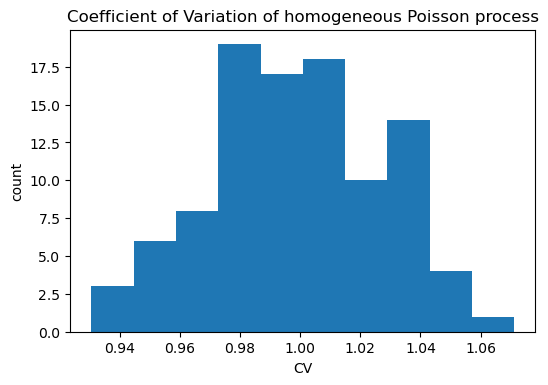

In [18]:
plt.figure(dpi=100)
plt.hist(cv_list)
plt.xlabel('CV')
plt.ylabel('count')
plt.title("Coefficient of Variation of homogeneous Poisson process")
plt.show()

In [19]:
print(np.mean(cv_list))

0.9988464250640561


As predicted by theory, the CV values are clustered around 1.